In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
x=df.drop(columns=['math_score'],axis=1)

In [5]:
y=df['math_score']

In [6]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [17]:
## Create column transformation
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

numeric_transformer=StandardScaler()
category_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ('StandardScaler',numeric_transformer,num_features),
        ('OneHotEncoder',category_transformer,cat_features),
    ]
)

In [20]:
X=preprocessor.fit_transform(x)

In [21]:
X.shape

(1000, 19)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def evaluate_metrics(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mse,mae,rmse,r2

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [43]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'SVR':SVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False),
    'XGBRegressor':XGBRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)

    model_train_mse,model_train_mae,model_train_rmse,model_train_r2=evaluate_metrics(Y_train,Y_train_pred)
    model_test_mse,model_test_mae,model_test_rmse,model_test_r2=evaluate_metrics(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print("\n")

LinearRegression
Model performance for Training set
- Mean Squared Error: 28.3475
- Root Mean Squared Error: 5.3242
- Mean Absolute Error: 4.2678
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Squared Error: 29.1602
- Root Mean Squared Error: 5.4000
- Mean Absolute Error: 4.2202
- R2 Score: 0.8802


Ridge
Model performance for Training set
- Mean Squared Error: 28.3378
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Mean Squared Error: 29.0563
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Lasso
Model performance for Training set
- Mean Squared Error: 43.4783
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Mean Squared Error: 42.5063
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Ridge,0.880593
0,LinearRegression,0.880166
8,CatBoostRegressor,0.851632
6,RandomForestRegressor,0.851382
7,AdaBoostRegressor,0.851136
2,Lasso,0.825320
9,XGBRegressor,0.821220
3,KNeighborsRegressor,0.783770
5,DecisionTreeRegressor,0.755567
4,SVR,0.728600


- Above we can see ridge ansd linear regression have highest r2_score

## We will use Linear Regression

In [45]:
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(X_train,Y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_pred,Y_test)*100
print("Accuracy of model is : %.2f"%score)

Accuracy of model is : 86.77


Text(0, 0.5, 'Predicted')

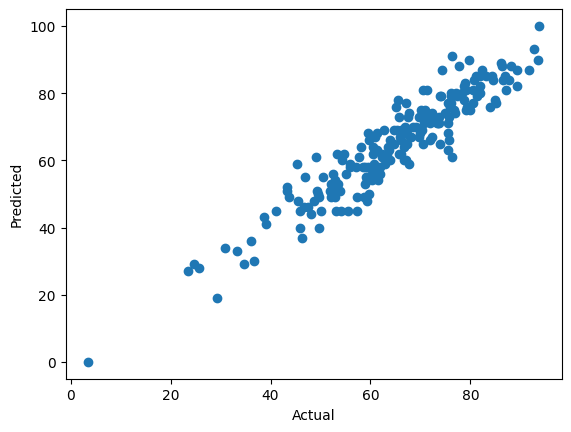

In [46]:
## now plot Y_pred and Y_test if there is linear relation than our prediction is correct
plt.scatter(y_pred,Y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [48]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.31250,14.68750
737,53,58.84375,-5.84375
740,80,77.15625,2.84375
660,74,76.93750,-2.93750
411,84,87.78125,-3.78125
...,...,...,...
408,52,43.21875,8.78125
332,62,62.31250,-0.31250
208,74,67.71875,6.28125
613,65,66.93750,-1.93750
